## Uppgift E00

### Uppgift 0

## A

x-v√§rden: [149.6714153   86.17356988 164.76885381 252.30298564  76.58466253
  76.58630431 257.92128155 176.74347292  53.05256141 154.25600436]
Finns det x-v√§rden >= 300? True


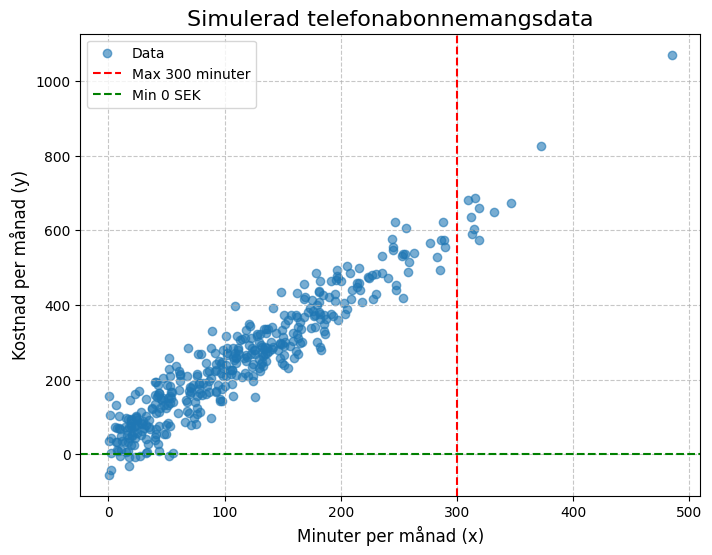

Antal datapunkter d√§r x >= 300: 11
Antal datapunkter d√§r y < 0: 8


In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Simulera data
np.random.seed(42)  # S√§tt seed f√∂r reproducerbarhet
x = np.random.normal(100, 100, 400) 
x = np.abs(x)  # Simulera x-v√§rden och ta absolutv√§rde
epsilon = np.random.normal(0, 50, 400)  # Simulera brus
y = 2 * x + 25 + epsilon  # Ber√§kna y-v√§rden

# Visa de f√∂rsta 10 x-v√§rdena
print("x-v√§rden:", x[:10])

# Kontrollera om n√•got x-v√§rde √§r >= 300
print("Finns det x-v√§rden >= 300?", np.any(x >= 300))

# Plotta datasetet
plt.figure(figsize=(8, 6))  # Anpassa storleken p√• plotten
plt.scatter(x, y, alpha=0.6, label='Data')

# L√§gg till boundaries
plt.axvline(x=300, color='red', linestyle='--', label='Max 300 minuter')  # Vertikal linje vid x=300
plt.axhline(y=0, color='green', linestyle='--', label='Min 0 SEK')  # Horisontell linje vid y=0

plt.title("Simulerad telefonabonnemangsdata", fontsize=16)
plt.xlabel("Minuter per m√•nad (x)", fontsize=12)
plt.ylabel("Kostnad per m√•nad (y)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# R√§kna antalet datapunkter d√§r x >= 300 och y < 0
x_over_300 = np.sum(x >= 300)
y_under_0 = np.sum(y < 0)

# Skriv ut resultaten
print(f"Antal datapunkter d√§r x >= 300: {x_over_300}")
print(f"Antal datapunkter d√§r y < 0: {y_under_0}")

F√∂rklaring:

1: np.random.seed(42): S√§kerst√§ller att samma slumpm√§ssiga v√§rden genereras varje g√•ng koden k√∂rs.

2: np.random.normal(100, 100, 400): Skapar 400 x-v√§rden fr√•n en normalf√∂rdelning med medelv√§rde 100 och standardavvikelse 10.

3: np.abs(): Tar absolutv√§rdet av x-v√§rdena f√∂r att undvika negativa minuter.

4: np.random.normal(0, 50, 400): Skapar 400 brusv√§rden fr√•n en normalf√∂rdelning med medelv√§rde 0 och standardavvikelse 50.

5: y = 2 * x + 25 + epsilon: Ber√§knar y-v√§rdena med hj√§lp av den givna formeln.

6: plt.scatter(): Plottar datapunkterna f√∂r att visualisera datasetet.

##  B

Plocka bort outliers

L√§ngd av x, outliers borttagna: 381
L√§ngd av y, outliers borttagna: 381


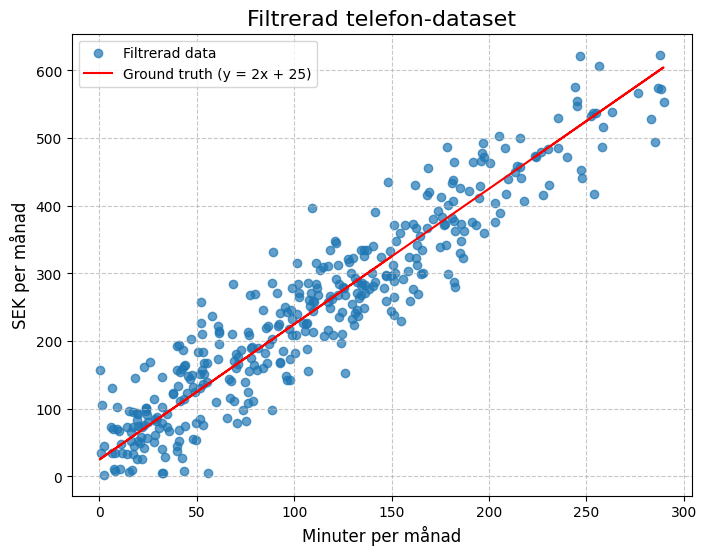

In [74]:

mask = (x <= 300) & (y >= 0)  # Skapa en mask f√∂r att filtrera bort outliers
x_filtered = x[mask]  # Filtrera x-v√§rden
y_filtered = y[mask]  # Filtrera y-v√§rden

# Skriv ut l√§ngden p√• de filtrerade v√§rdena
print(f"L√§ngd av x, outliers borttagna: {len(x_filtered)}")
print(f"L√§ngd av y, outliers borttagna: {len(y_filtered)}")

# Rita upp det filtrerade datasetet
plt.figure(figsize=(8, 6))
plt.scatter(x_filtered, y_filtered, alpha=0.7, label='Filtrerad data')

# Rita "ground truth" med de sanna parametrarna
plt.plot(x_filtered, 2 * x_filtered + 25, color='red', label='Ground truth (y = 2x + 25)')

plt.title("Filtrerad telefon-dataset", fontsize=16)
plt.xlabel("Minuter per m√•nad", fontsize=12)
plt.ylabel("SEK per m√•nad", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

L√§ngd av x, outliers borttagna: 381
L√§ngd av y, outliers borttagna: 381


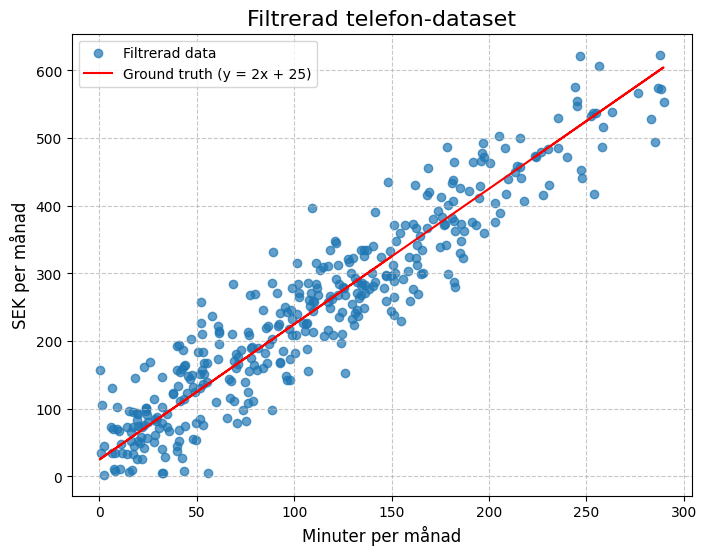

In [75]:
# Filtrera bort outliers
mask = (x <= 300) & (y >= 0)  # Skapa en mask f√∂r att filtrera bort outliers
x_filtered = x[mask]  # Filtrera x-v√§rden
y_filtered = y[mask]  # Filtrera y-v√§rden

# Skriv ut l√§ngden p√• de filtrerade v√§rdena
print(f"L√§ngd av x, outliers borttagna: {len(x_filtered)}")
print(f"L√§ngd av y, outliers borttagna: {len(y_filtered)}")



# Rita upp det filtrerade datasetet
plt.figure(figsize=(8, 6))
plt.scatter(x_filtered, y_filtered, alpha=0.7, label='Filtrerad data')

# Rita "ground truth" med de sanna parametrarna
plt.plot(x_filtered, 2 * x_filtered + 25, color='red', label='Ground truth (y = 2x + 25)')

plt.title("Filtrerad telefon-dataset", fontsize=16)
plt.xlabel("Minuter per m√•nad", fontsize=12)
plt.ylabel("SEK per m√•nad", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## C

Skapa en databas med v√§rderna

In [76]:
import pandas as pd

# Skapa DataFrame med de filtrerade v√§rdena
df = pd.DataFrame({"Minuter": x_filtered, "SEK": y_filtered})

# Visa de f√∂rsta raderna av DataFrame
df.head()



Minuter         SEK
0  149.671415  244.621448
1   86.173570  167.378389
2  164.768854  354.799893
3  252.302986  531.955001
4   76.584663  155.666051

## Uppgift 1

### Train / test split

## A

In [77]:
import pandas as pd
import numpy as np

# a) Skapa en funktion f√∂r train-test-split med specificerad signatur
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float = 0.7, random_state: int = 42, replace:bool = False) -> tuple:
    """
    Delar upp data i tr√§nings- och testdata.

    Parametrar:
    - X: DataFrame med oberoende variabler.
    - y: DataFrame med beroende variabler.
    - train_fraction: Andel av data som ska anv√§ndas f√∂r tr√§ning (standard √§r 0.7).
    - random_state: Seed f√∂r reproducerbarhet (standard √§r 42).
    - replace: Om sampling ska ske med ers√§ttning (standard √§r False).

    Returnerar:
    - En tuple med (X_train, X_test, y_train, y_test).
    """
    # Kontrollera att X och y har samma l√§ngd
    if len(X) != len(y):
        raise ValueError("X och y m√•ste ha samma l√§ngd")
    
    # Blanda data f√∂r att undvika bias
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    # Dela upp data i tr√§nings- och testdata
    train_size = int(len(X) * train_fraction)
    X_train = X.iloc[indices[:train_size]]
    X_test = X.iloc[indices[train_size:]]
    y_train = y.iloc[indices[:train_size]]
    y_test = y.iloc[indices[train_size:]]
    
    return (X_train, X_test, y_train, y_test)


## B

In [78]:
# b) Anv√§nd funktionen f√∂r att dela upp ditt data
# Skapa en DataFrame med de filtrerade v√§rdena
df = pd.DataFrame({'Minutes': x_filtered, 'Cost': y_filtered})

# Dela upp data i tr√§nings- och testdata
X_train, X_test, y_train, y_test = train_test_split(df[['Minutes']], df[['Cost']])

# Skriv ut l√§ngden p√• tr√§nings- och testdata
print(f"L√§ngd av X_train: {len(X_train)}")
print(f"L√§ngd av X_test: {len(X_test)}")
print(f"L√§ngd av y_train: {len(y_train)}")
print(f"L√§ngd av y_test: {len(y_test)}")

# Kontrollera att tr√§nings- och testdata inte √∂verlappar
train_indices = X_train.index
test_indices = X_test.index
overlap = set(train_indices).intersection(set(test_indices))
print(f"√ñverlappande index mellan tr√§nings- och testdata: {overlap}")


L√§ngd av X_train: 266
L√§ngd av X_test: 115
L√§ngd av y_train: 266
L√§ngd av y_test: 115
√ñverlappande index mellan tr√§nings- och testdata: set()


## Uppgift 2


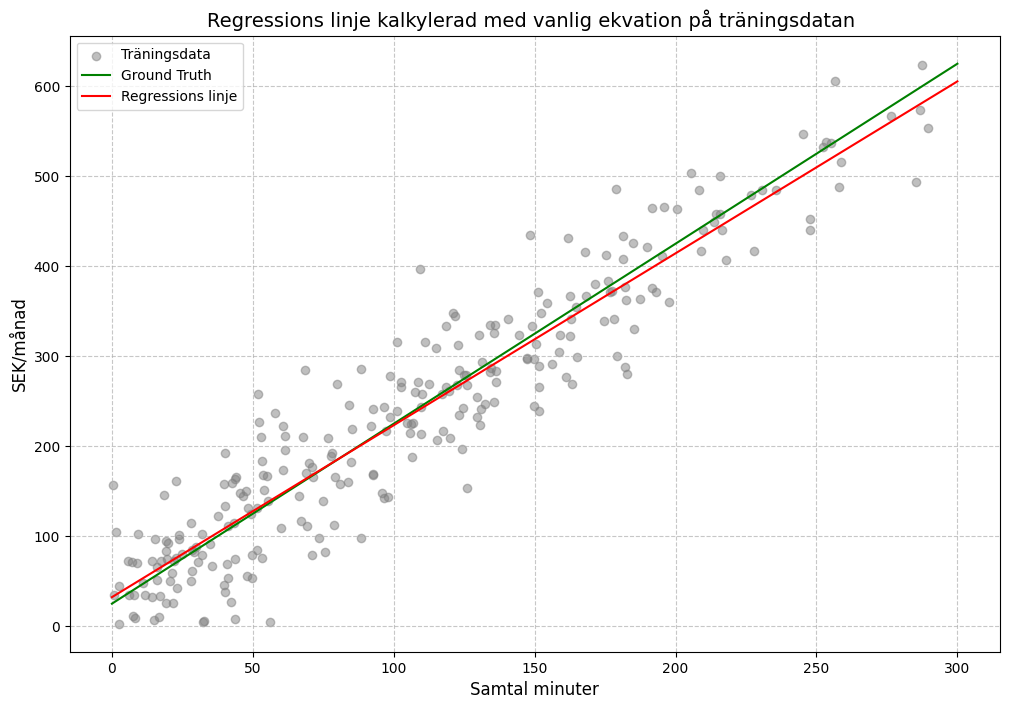

Ber√§knade koefficienter:
Œ≤‚ÇÄ (intercept): 32.22
Œ≤‚ÇÅ (lutning): 1.91


In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Ber√§kna koefficienterna med normalformeln
# L√§gg till en kolumn med ettor f√∂r intercept
X = np.column_stack([np.ones(len(X_train)), X_train['Minutes']])
y = y_train['Cost'].values

# Normalformeln: Œ≤ = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Skapa prediktioner f√∂r plottet
x_plot = np.linspace(0, 300, 100)
y_pred = beta[0] + beta[1] * x_plot

# Skapa plot
plt.figure(figsize=(12, 8))

# Plotta tr√§ningsdata
plt.scatter(X_train['Minutes'], y_train['Cost'], alpha=0.5, color='gray', label='Tr√§ningsdata')

# Plotta ground truth (y = 2x + 25)
plt.plot(x_plot, 2 * x_plot + 25, color='green', label='Ground Truth')

# Plotta regressionslinjen
plt.plot(x_plot, y_pred, color='red', label='Regressions linje')

# L√§gg till labels och titel
plt.title('Regressions linje kalkylerad med vanlig ekvation p√• tr√§ningsdatan ', fontsize=14)
plt.xlabel('Samtal minuter', fontsize=12)
plt.ylabel('SEK/m√•nad', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Skriv ut de ber√§knade koefficienterna
print(f"Ber√§knade koefficienter:")
print(f"Œ≤‚ÇÄ (intercept): {beta[0]:.2f}")
print(f"Œ≤‚ÇÅ (lutning): {beta[1]:.2f}")

## Uppgift 3

## A

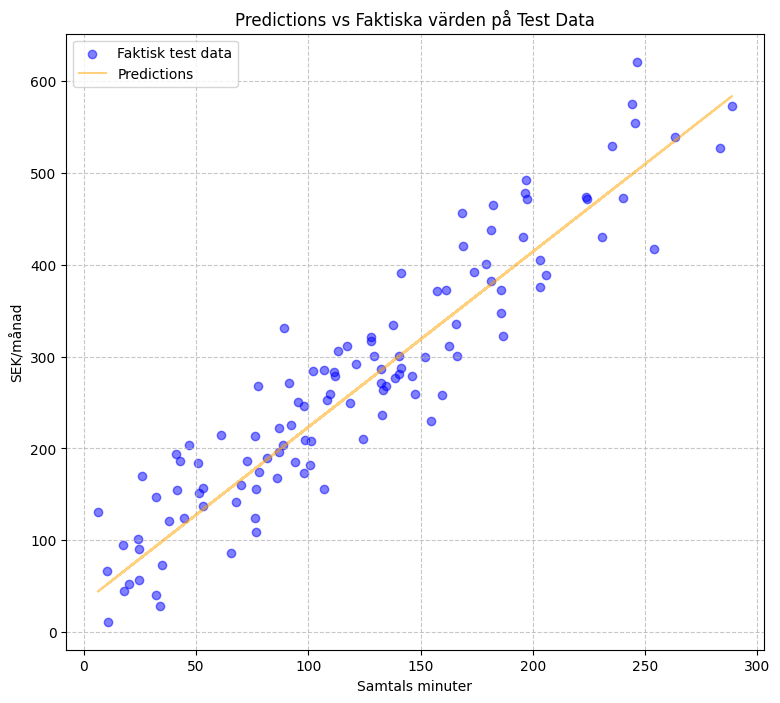

In [80]:
# Skapa design matrix f√∂r testdata
X_test_matrix = np.column_stack([np.ones(len(X_test)), X_test['Minutes']])

# G√∂r prediktioner med v√•ra ber√§knade beta-koefficienter
y_pred = X_test_matrix @ beta

# Plotta prediktioner och faktiska v√§rden
plt.figure(figsize=(9, 8))
plt.scatter(X_test['Minutes'], y_test['Cost'], color='blue', alpha=0.5, label='Faktisk test data')
plt.plot(X_test['Minutes'], y_pred, color='orange', alpha=0.5, label='Predictions')
plt.title('Predictions vs Faktiska v√§rden p√• Test Data')
plt.xlabel('Samtals minuter')
plt.ylabel('SEK/m√•nad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## B

# F√∂rklaring av koden
Del a) 

#### Prediktioner

Skapar design matrix f√∂r testdata
Vi skapar en design matrix X_test_matrix med en kolumn av ettor f√∂r intercept och en kolumn med minutv√§rden fr√•n testdata.
G√∂r prediktioner med beta-koefficienter
Vi anv√§nder v√•ra ber√§knade beta-koefficienter (beta) f√∂r att g√∂ra prediktioner p√• testdata.
Plottar faktiska v√§rden och prediktioner
Vi plottar b√•de faktiska testv√§rden (y_test) och prediktioner (y_pred) f√∂r att visualisera modellens prestanda.


Del b) 

#### Utv√§rderingsm√•tt

MAE (Mean Absolute Error)
Genomsnittligt absolut fel
Ber√§knar det genomsnittliga absoluta felet mellan faktiska v√§rden och prediktioner.
Mindre k√§nslig f√∂r outliers
MAE √§r mindre k√§nslig f√∂r extrema v√§rden j√§mf√∂rt med MSE.

#### MSE (Mean Squared Error)

Genomsnittligt kvadratfel
Ber√§knar det genomsnittliga kvadratiska felet.
Straffar stora fel h√•rdare
MSE straffar stora fel mer √§n MAE.

#### RMSE (Root Mean Squared Error)

Roten ur MSE
Ber√§knar roten ur MSE.
Fel i samma enhet som data
RMSE ger ett fel i samma enhet som originaldata, vilket g√∂r det l√§ttare att tolka.

In [81]:
# b) Ber√§kna MAE, MSE, RMSE
def mae(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Ber√§knar Mean Absolute Error"""
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Ber√§knar Mean Squared Error"""
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Ber√§knar Root Mean Squared Error"""
    return np.sqrt(mse(y_true, y_pred))

# Konvertera till numpy arrays f√∂r att undvika dimensionsproblem
y_test_values = y_test['Cost'].values
y_pred = y_pred.flatten()  # S√§kerst√§ll att y_pred har r√§tt dimension

# Ber√§kna utv√§rderingsm√•tten
mae_score = mae(y_test_values, y_pred)
mse_score = mse(y_test_values, y_pred)
rmse_score = rmse(y_test_values, y_pred)

print("Utv√§rderingsm√•tt p√• testdata:")
print(f"MAE: {mae_score:.2f}")
print(f"MSE: {mse_score:.2f}")
print(f"RMSE: {rmse_score:.2f}")

Utv√§rderingsm√•tt p√• testdata:
MAE: 40.12
MSE: 2401.58
RMSE: 49.01


## Uppgift 4


## A

In [82]:
import numpy as np
import pandas as pd

# S√§tt seed f√∂r reproducerbarhet
np.random.seed(42)

# Antal sampel
n_samples = 10000

# Simulera x_1, x_2, x_3
x_1 = np.abs(np.random.normal(100, np.sqrt(100), n_samples))  # |ùí©(100, 100)|
x_2 = np.random.uniform(0, 50, n_samples)  # ùí∞(0, 50)
x_3 = np.abs(np.random.normal(0, 2, n_samples))  # |ùí©(0, 2)|

# Simulera feltermen Œµ ~ ùí©(0, 50)
epsilon = np.random.normal(0, 50, n_samples)

# Ber√§kna y enligt modellen
y = 25 + 2 * x_1 + 0.5 * x_2 + 50 * x_3 + epsilon

# Skapa DataFrame
data = pd.DataFrame({'x_1': x_1, 'x_2': x_2, 'x_3': x_3, 'y': y})

# L√§gg till intercept-kolumn med ettor
data['intercept'] = 1

# Skapa DataFrame med √∂nskade kolumner
df = pd.DataFrame({
    'Intercept': data['intercept'],
    'Minuter': data['x_1'],
    'SMS': data['x_2'],
    'Surf (GB)': data['x_3'],
    'Kostnad': data['y']
})

# Visa de f√∂rsta raderna av DataFrame
# Kombinera f√∂rsta och sista rader i en snygg utskrift
print(pd.concat([df.head(2), pd.DataFrame([['...']*len(df.columns)], columns=df.columns), df.tail(2)]))

     Intercept     Minuter        SMS Surf (GB)     Kostnad
0            1  104.967142  16.062759  0.958919  307.853958
1            1   98.617357    5.15096  2.056136  307.772968
0          ...         ...        ...       ...         ...
9998         1  104.957656  37.691313  1.013816  368.795384
9999         1  106.443885  44.067762   3.16303    428.9165


## B

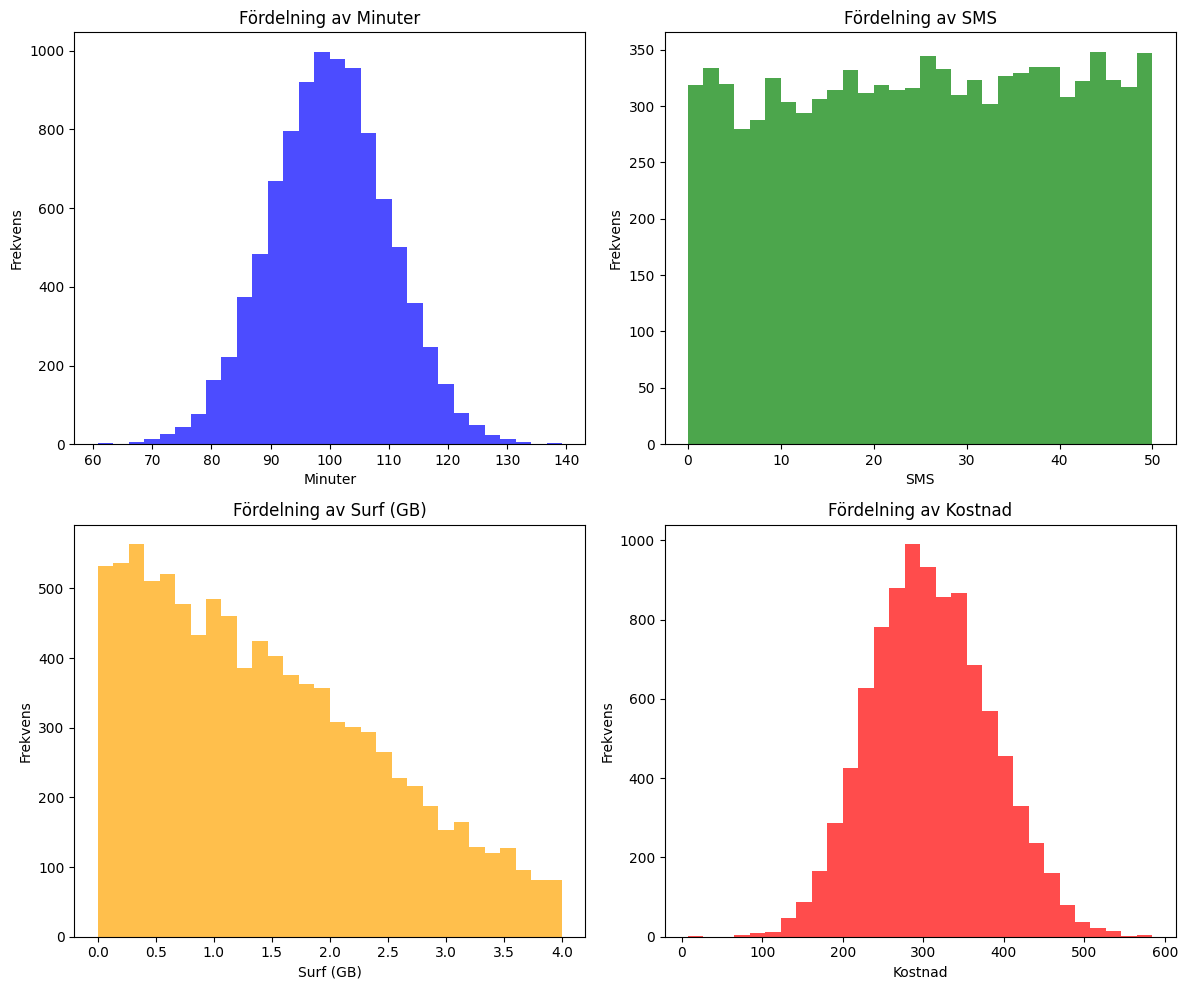

Antal rader f√∂re filtrering: 10000
Antal rader efter filtrering: 9580
Procent av data som beh√•llits: 95.80%


In [84]:
import matplotlib.pyplot as plt

# Skapa mask f√∂r filtrering
mask = (data['x_3'] < 4) & (data['x_1'] < 300) & (data['y'] > 0)
filtered_data = data[mask]

# Skapa en figur med 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Rita histogram f√∂r x_1 (Minuter)
axes[0, 0].hist(filtered_data['x_1'], bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title('F√∂rdelning av Minuter')
axes[0, 0].set_xlabel('Minuter')
axes[0, 0].set_ylabel('Frekvens')

# Rita histogram f√∂r x_2 (SMS)
axes[0, 1].hist(filtered_data['x_2'], bins=30, color='green', alpha=0.7)
axes[0, 1].set_title('F√∂rdelning av SMS')
axes[0, 1].set_xlabel('SMS')
axes[0, 1].set_ylabel('Frekvens')

# Rita histogram f√∂r x_3 (Surf (GB))
axes[1, 0].hist(filtered_data['x_3'], bins=30, color='orange', alpha=0.7)
axes[1, 0].set_title('F√∂rdelning av Surf (GB)')
axes[1, 0].set_xlabel('Surf (GB)')
axes[1, 0].set_ylabel('Frekvens')

# Rita histogram f√∂r y (Kostnad)
axes[1, 1].hist(filtered_data['y'], bins=30, color='red', alpha=0.7)
axes[1, 1].set_title('F√∂rdelning av Kostnad')
axes[1, 1].set_xlabel('Kostnad')
axes[1, 1].set_ylabel('Frekvens')

# Justera layouten
plt.tight_layout()

# Visa figurerna
plt.show()

# Visa antal rader f√∂re och efter filtrering
print(f"Antal rader f√∂re filtrering: {len(data)}")
print(f"Antal rader efter filtrering: {len(filtered_data)}")
print(f"Procent av data som beh√•llits: {(len(filtered_data)/len(data))*100:.2f}%")

## Uppgift 5

## A

In [85]:
import numpy as np

# df = pd.DataFrame({'Minuter': x_filtered, 'Kostnad': y_filtered})

# Blanda datan f√∂r att s√§kerst√§lla att den √§r slumpm√§ssigt f√∂rdelad
df = df.sample(frac=1, random_state=42)

# Ber√§kna antalet rader f√∂r tr√§ningsdata
train_size = int(0.8 * len(df))

# Dela upp datan i tr√§nings- och testset
X_train = df[['Minuter']].iloc[:train_size]
X_test = df[['Minuter']].iloc[train_size:]
y_train = df[['Kostnad']].iloc[:train_size]
y_test = df[['Kostnad']].iloc[train_size:]

# Skriv ut l√§ngden p√• tr√§nings- och testdata
print(f"L√§ngd av X_train: {len(X_train)}")
print(f"L√§ngd av X_test: {len(X_test)}")
print(f"L√§ngd av y_train: {len(y_train)}")
print(f"L√§ngd av y_test: {len(y_test)}")

# Kontrollera att tr√§nings- och testdata inte √∂verlappar
train_indices = X_train.index
test_indices = X_test.index
overlap = set(train_indices).intersection(set(test_indices))
print(f"√ñverlappande index mellan tr√§nings- och testdata: {overlap}")

L√§ngd av X_train: 8000
L√§ngd av X_test: 2000
L√§ngd av y_train: 8000
L√§ngd av y_test: 2000
√ñverlappande index mellan tr√§nings- och testdata: set()


## B

In [86]:
import numpy as np

# L√§gg till en kolumn med ettor f√∂r interceptet
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Ber√§kna koefficienterna med normalekvationen
beta_hat = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

print(f"Ber√§knade koefficienter (beta_hat): {beta_hat}")

Ber√§knade koefficienter (beta_hat):       Kostnad
0  117.080377
1    1.991683


## C

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# L√§gg till en kolumn med ettor f√∂r interceptet i testdatan
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# G√∂r f√∂ruts√§gelser p√• testdatan
y_pred = X_test_b @ beta_hat

# Ber√§kna MAE, MSE och RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 63.905248816391875
Mean Squared Error (MSE): 6442.205658183145
Root Mean Squared Error (RMSE): 80.26335189975026
